In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from util import load_sample,load_acertos,item_info_inep,item_stats,item_url

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%load_ext autoreload
%autoreload 2

def make_clickable(val):
    return f'<a href="{val}">link</a>'

In [4]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1.3,
    color_codes=True,
    rc=None,
)
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# rodar primeiro as células da seção Calcular estatísticas TCT dos itens em 00-PrepareData

def istats(ano,area,sort_by='total.r',return_styled=False):
    istats = pd.read_csv(f'data/istats-{ano}-{area}.csv')
    istats = istats.drop_duplicates('item')
    istats = istats.rename(columns={'CO_POSICAO':'pos','SG_AREA':'area','TX_GABARITO':'gab',
                                   'CO_HABILIDADE':'habilidade','IN_ITEM_ABAN':'aban',
                                   'TX_MOTIVO_ABAN':'motivo','NU_PARAM_A':'a','NU_PARAM_B':'b','NU_PARAM_C':'c',
                                   'TX_COR':'cor','CO_PROVA':'prova','TP_LINGUA':'ling',
                                   'IN_ITEM_ADAPTADO':'adaptado','TP_VERSAO_DIGITAL':'digital'})
    istats = istats.sort_values(sort_by)
    if return_styled:
        return istats.style.format({'url':make_clickable,
                                'mean':'{:.2f}','sd':'{:.2f}','total.r':'{:.3f}',
                               'habilidade':'{:.0f}'})
    return istats
istats(2009,'MT')

,item,N,mean,sd,total.r,url,pos,area,gab,habilidade,...,motivo,a,b,c,cor,prova,ano,ling,adaptado,digital
43,60236,10000,0.24,0.42,0.07,https://www.curso-objetivo.br/vestibular/resol...,179,MT,B,30.00,...,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,AMARELA,61,2009,NaN,NaN,NaN
35,60261,10000,0.32,0.47,0.09,https://www.curso-objetivo.br/vestibular/resol...,171,MT,C,30.00,...,Não permitiu a convergência do algoritmo de es...,NaN,NaN,NaN,AMARELA,61,2009,NaN,NaN,NaN
41,60240,10000,0.14,0.34,0.10,https://www.curso-objetivo.br/vestibular/resol...,177,MT,E,5.00,...,NaN,1.48,4.00,0.14,AMARELA,61,2009,NaN,NaN,NaN
40,60242,10000,0.22,0.41,0.11,https://www.curso-objetivo.br/vestibular/resol...,176,MT,C,21.00,...,NaN,2.84,3.27,0.21,AMARELA,61,2009,NaN,NaN,NaN
21,60250,10000,0.17,0.37,0.13,https://www.curso-objetivo.br/vestibular/resol...,157,MT,B,14.00,...,NaN,2.70,2.94,0.15,AMARELA,61,2009,NaN,NaN,NaN
36,60262,10000,0.24,0.43,0.14,https://www.curso-objetivo.br/vestibular/resol...,172,MT,C,25.00,...,NaN,1.05,4.28,0.21,AMARELA,61,2009,NaN,NaN,NaN
44,60234,10000,0.23,0.42,0.14,https://www.curso-objetivo.br/vestibular/resol...,180,MT,B,13.00,...,NaN,3.10,2.81,0.23,AMARELA,61,2009,NaN,NaN,NaN
34,60260,10000,0.24,0.43,0.14,https://www.curso-objetivo.br/vestibular/resol...,170,MT,B,14.00,...,NaN,3.68,2.87,0.22,AMARELA,61,2009,NaN,NaN,NaN
37,60263,10000,0.17,0.38,0.15,https://www.curso-objetivo.br/vestibular/resol...,173,MT,E,4.00,...,NaN,2.67,2.75,0.16,AMARELA,61,2009,NaN,NaN,NaN
38,58675,10000,0.28,0.45,0.15,https://www.curso-objetivo.br/vestibular/resol...,174,MT,B,19.00,...,NaN,3.12,3.17,0.27,AMARELA,61,2009,NaN,NaN,NaN


In [7]:
l = []
for ano in range(2009,2023):
    for area in ['CN','CH','MT']:
        df = istats(ano,area)
        l.append(df)
allitems = pd.concat(l)

In [21]:
print(len(allitems))
data = allitems.dropna(subset=['a'])
print(len(data))
data = data.query('b < 15')
print(len(data))

1890
1855
1853


In [8]:
df = allitems.groupby(['area'])['b'].describe()
df

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
CH,623.00,1.16,0.83,-2.11,0.64,1.11,1.61,7.33
CN,614.00,1.52,2.57,-1.80,0.90,1.43,1.92,61.05
MT,618.00,2.06,1.46,-1.26,1.35,1.95,2.52,17.62


(0.0, 5.0)

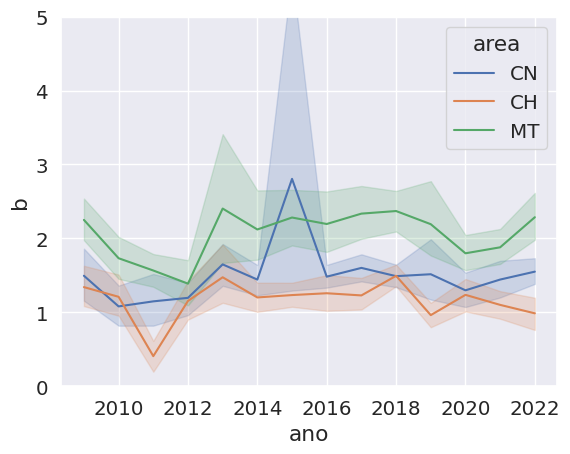

In [12]:
#Visualização dos valores de 'a' ao longo do ano
var = 'b'
data = allitems.dropna(subset=var)
ax = sns.lineplot(x="ano", y=var, hue="area", data=data)
ax.set_ylim(0,5)

[Text(0.5, 1.0, 'Análise do parametro R ao longo dos anos')]

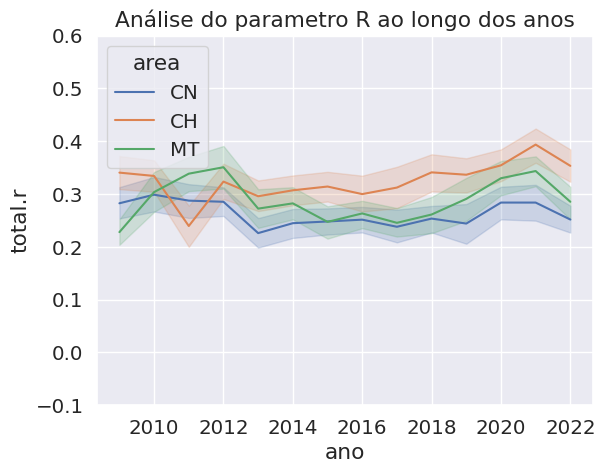

In [11]:
#Visualização dos valores de 'total.r' ao longo do ano
data = allitems.dropna(subset='a')
ax = sns.lineplot(x="ano", y="total.r", hue="area", data=data)
ax.set_ylim(-0.1,0.6)
ax.set(title="Análise do parametro R ao longo dos anos")

In [173]:
#Análise de correlação entre os parâmetros a, b e total.r (Bisserial)
df_abr = pd.DataFrame(data)
df_abr = df_abr[['total.r','a','b']]

[Text(0.5, 1.0, 'Correlação parâmetros a, b e R')]

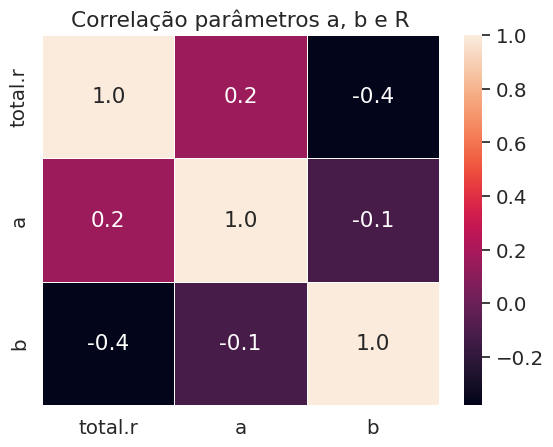

In [174]:
corr_abr = df_abr.corr()
plot = sns.heatmap(corr_abr, annot = True, fmt=".1f", linewidths=.5)
plot.set(title = 'Correlação parâmetros a, b e R')

In [24]:
#Análise temporal da correlação entre os parâmetros a e b
print(len(allitems))
data = allitems.dropna(subset=['a'])
print(len(data))
data = data.query('b < 10')
print(len(data))
df_ab = pd.DataFrame(data)
df_ab = df_ab[["ano","a","b"]]

df_ab

1890
1855
1849


,ano,a,b
34,2009,4.40,2.69
29,2009,3.44,2.55
43,2009,3.87,2.44
22,2009,1.61,2.99
16,2009,3.69,2.43
...,...,...,...
40,2022,2.19,1.57
84,2022,1.32,0.65
58,2022,2.57,1.59
30,2022,2.81,0.64


1890
1855
1849


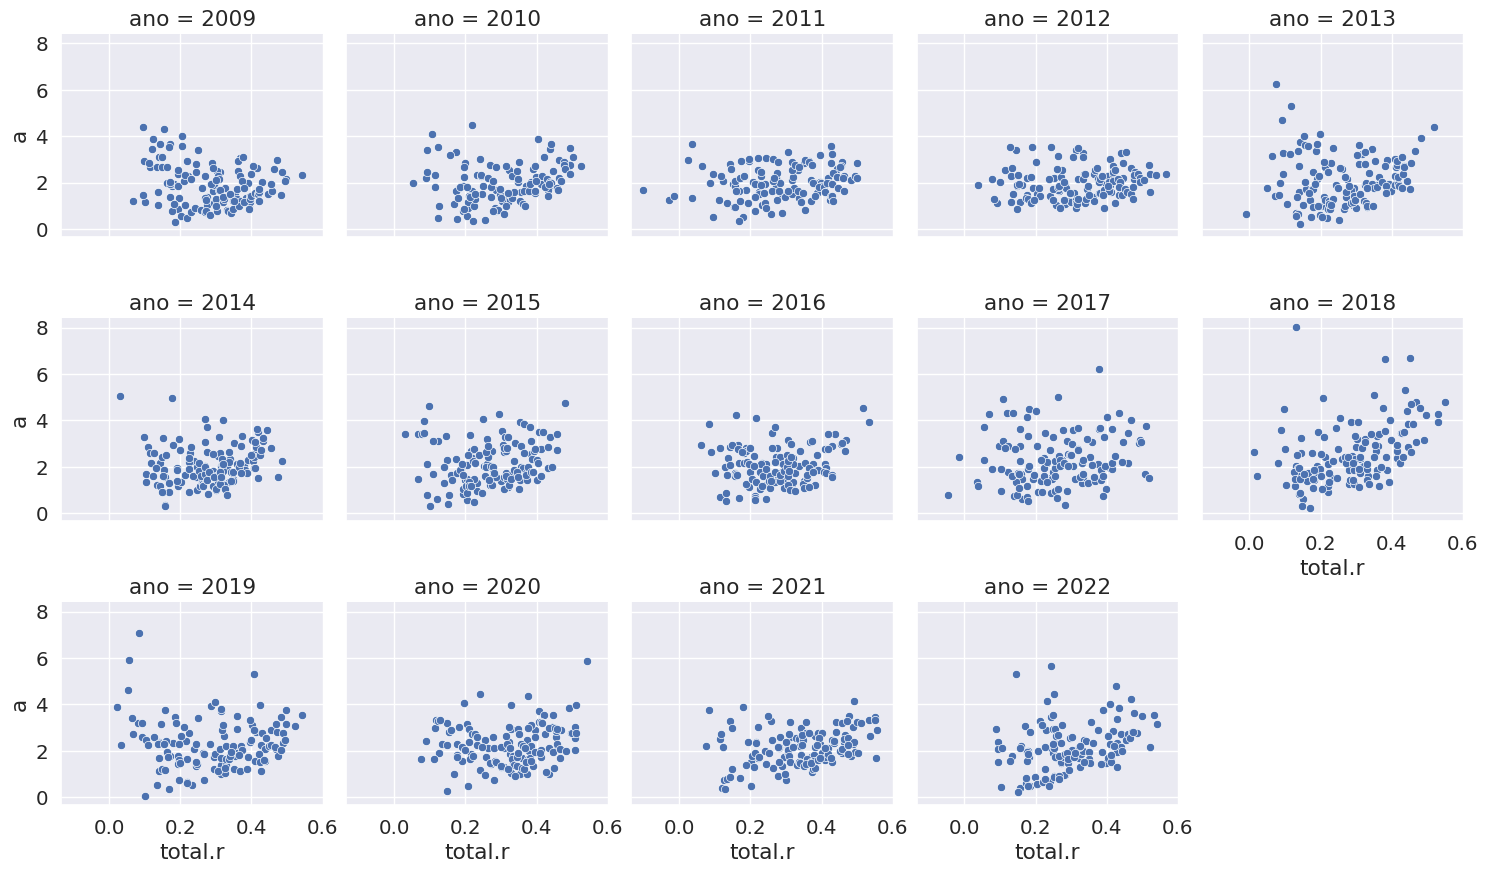

In [31]:
#Análise temporal da correlação entre os parâmetros a e b
print(len(allitems))
data = allitems.dropna(subset=['a'])
print(len(data))
data = data.query('b < 10')
print(len(data))
plot = sns.FacetGrid(data, col="ano", col_wrap=5)
plot.map(sns.scatterplot, "total.r", "a")

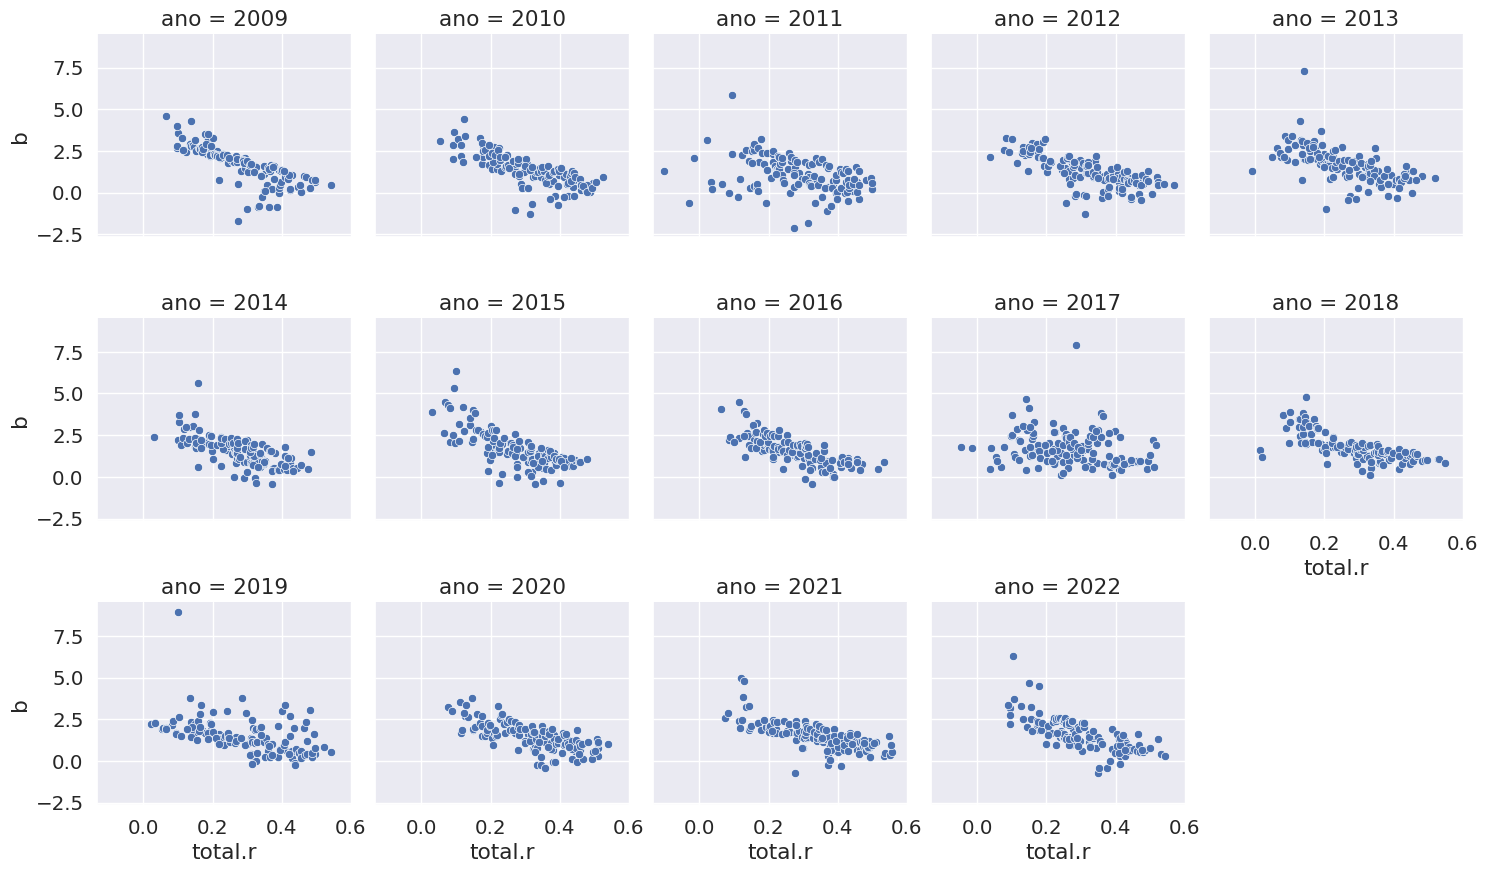

In [30]:
plot = sns.FacetGrid(data, col="ano", col_wrap=5)
plot.map(sns.scatterplot, "total.r", "b")

In [176]:
#Análise temporal de correlação entre os parâmertros a e Total.R
df_ar = pd.DataFrame(data)
df_ar = df_ar[["ano","total.r","a"]]

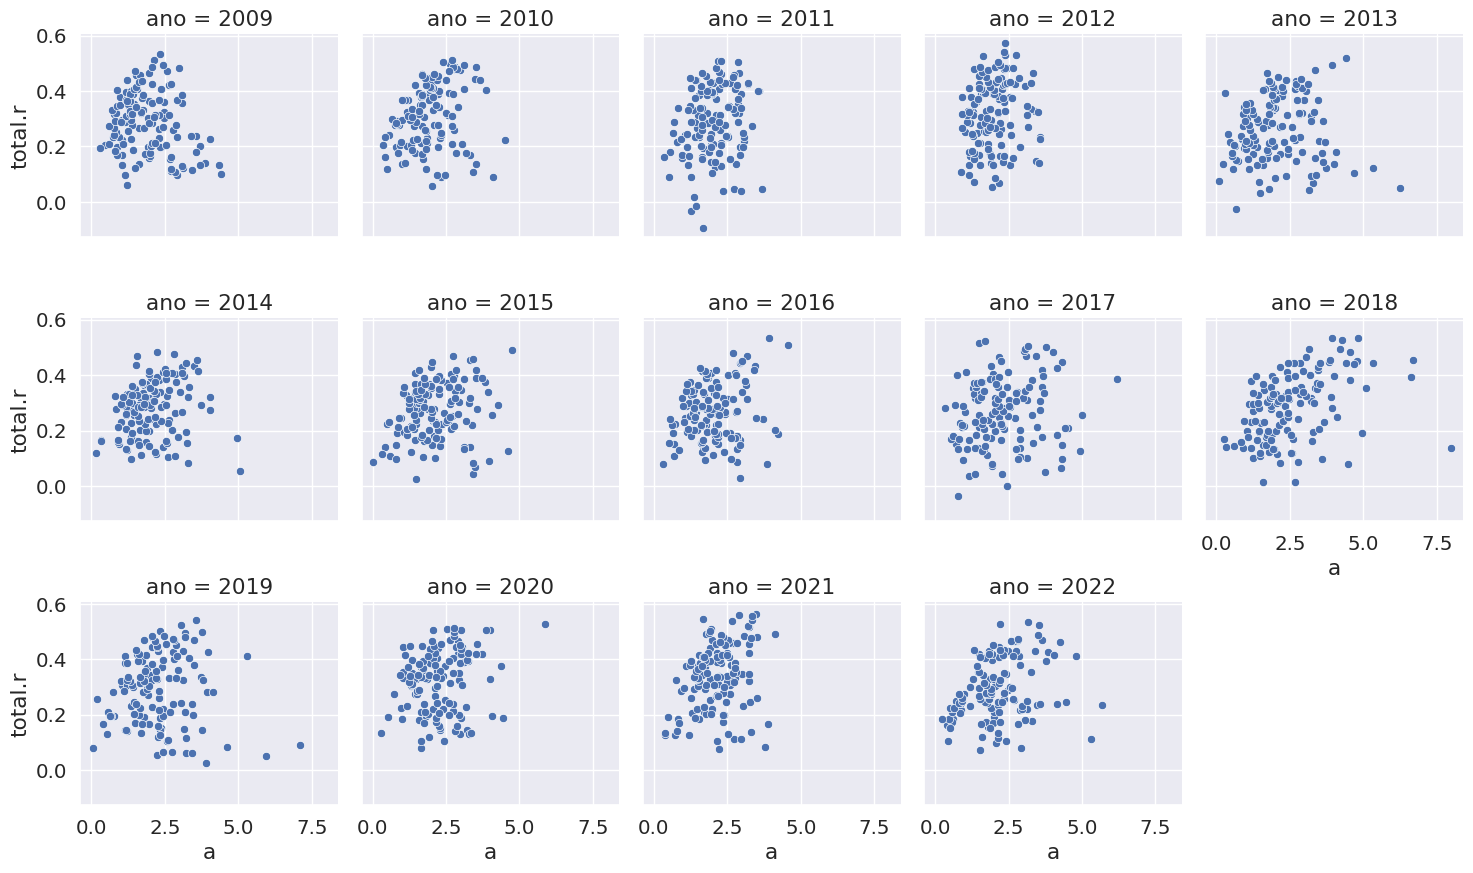

In [178]:
#Análise temporal da correlação entre os parâmetros a e Total.R
plot = sns.FacetGrid(df_ar, col="ano", col_wrap=5)
plot.map(sns.scatterplot, "a", "total.r")

In [182]:
#Analise temporal de correlação entre os parâmetros b e Total.R
df_br = pd.DataFrame(data)
df_br = df_br[["ano","total.r","b"]]

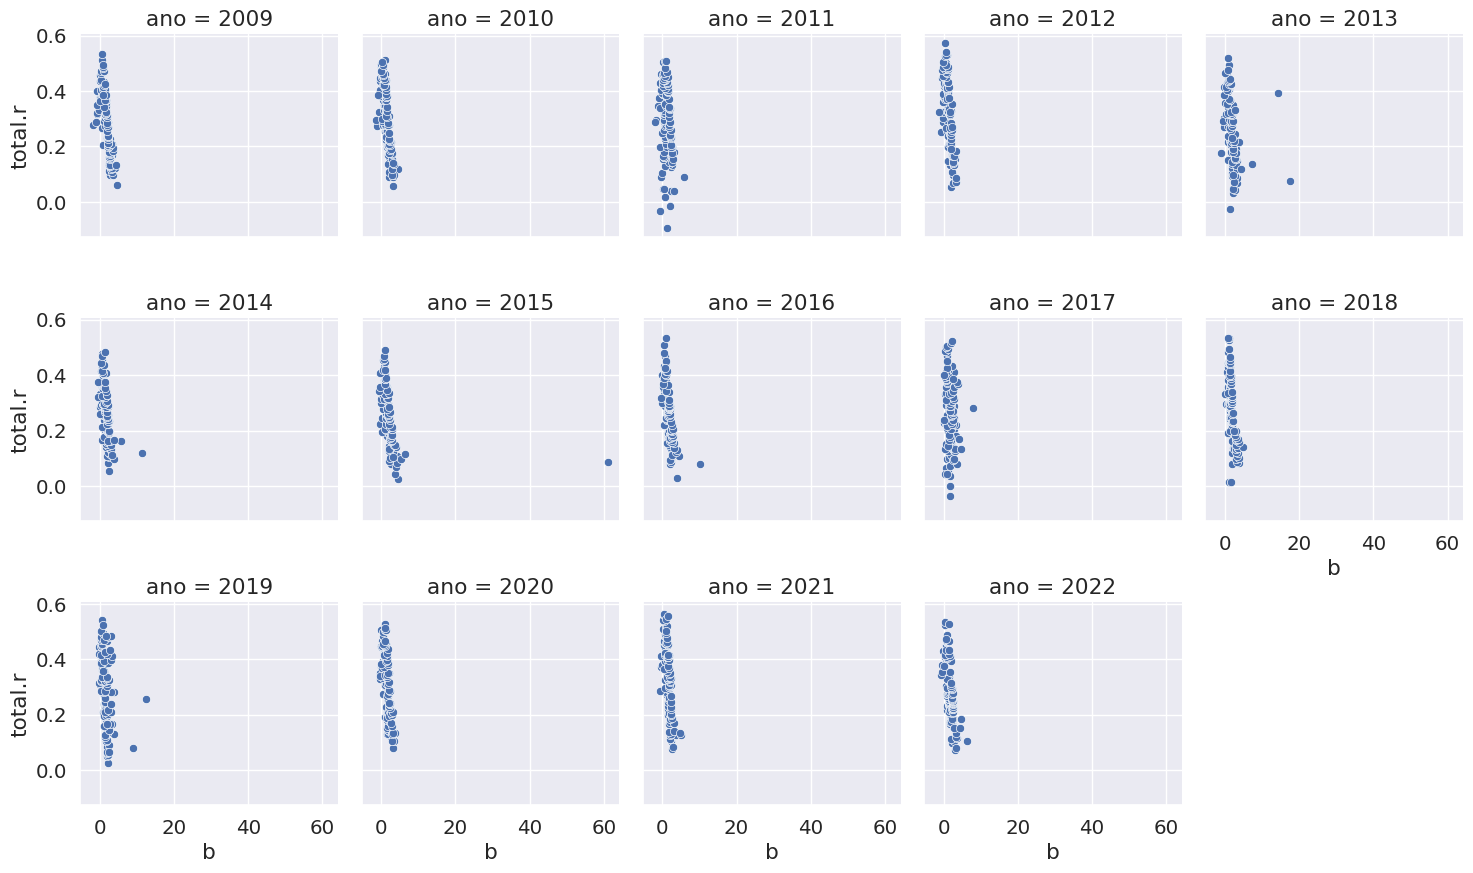

In [184]:
#Analise temporal de correlação entre os parâmetros b e Total.R
plot = sns.FacetGrid(df_br, col="ano", col_wrap=5)
plot.map(sns.scatterplot, "b", "total.r")